In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [112]:
data = pd.read_csv("../lab4/titanic_clean.csv")

In [138]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,-0.479795,2,1,-0.426350,0,0,1
1,0,3,0,0.677525,0,0,-0.527820,0,0,1
2,0,3,0,0.291752,0,0,-0.471954,0,0,1
3,0,2,1,1.140454,1,0,-0.095718,0,0,1
4,0,1,0,0.677525,0,1,2.810706,0,0,1


In [139]:
scaler = StandardScaler()
data[["Age", "Fare"]] = scaler.fit_transform(data[["Age", "Fare"]])

In [140]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,-0.479795,2,1,-0.426350,0,0,1
1,0,3,0,0.677525,0,0,-0.527820,0,0,1
2,0,3,0,0.291752,0,0,-0.471954,0,0,1
3,0,2,1,1.140454,1,0,-0.095718,0,0,1
4,0,1,0,0.677525,0,1,2.810706,0,0,1


In [141]:
y = data["Survived"].values
X = data.drop(columns=["Survived"]).values

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [143]:
model = LogisticRegression(verbose=1, multi_class='multinomial', max_iter=500)

In [144]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=500, multi_class='multinomial', verbose=1)

In [145]:
y_pred = model.predict(X_test)

In [146]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, y_pred, average="micro"
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

score = model.score(X_test, y_test)

print(f"Model score: {score}")

Precision: 0.8
Recall: 0.8
F-score: 0.8000000000000002
Model score: 0.8


In [147]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

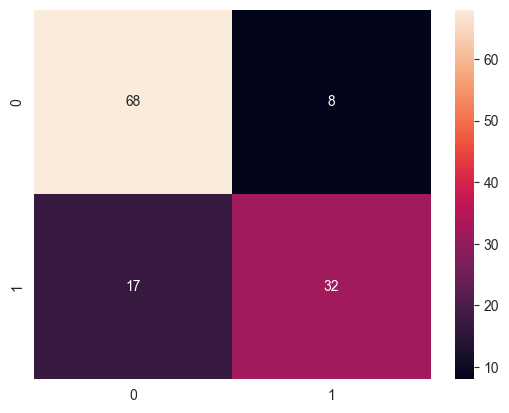

In [148]:
import seaborn as sns
sns.heatmap(cm, annot=True)